<a href="https://colab.research.google.com/github/3zero69/-/blob/main/1104_pg_183~227_(201~211_%EC%A0%9C%EC%99%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. 분류(Classification)

### 1. 지도학습
 : 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식
* Bagging : Random Forest
* Boosting : Gradient Boosting. XGBoost

## 2. 결정 트리
: 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것

###1. 결정노드
 : 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건 생성

###2. 정보의 균일도 측정 방법
* 정보이득 : 주어진 데이터 집합의 혼잡도를 의미하는 엔트로피를 기반으로 하여 정보이득이 높은 속성을 기준으로 분할
* 지니 계수 : 경제학에서 불평등 지수를 나타날 때 사용하는 계수로 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 게수가 낮은 속성을 기준으로 분할

###3. 결정 트리 모델의 특징
* 장점 : 균일도라는 룰을 기반으로 하고 있어 알고리즘이 쉽고 직관적
* 단점 : 과적합으로 정확도가 떨어짐

###4. 결정 트리 파라미터 `DecisionTreeClassifier & DecisionTreeRegressor`

* ` min_samples_split`  노드를 분할하기 위한 최소한의 샘플 데이터 수
* `min_samples_leaf` 말단 노드가 되기 위한 최소한의 샘플 데이터 수
* `max_features` 최대 피처 개수, 디폴트는 None
* `max_depth` 트리의 최대 깊이 규정, 깊어지면 과적합할 수 있음
* `max_leaf_nodes` 말단 노드의 최대 개수

###5. 결정 트리 모델의 시각화 Graphviz 패키지
: `export_graphviz` (학습이 완료된 Estimator, 피처이름 리스트, 레이블 이름 리스트) => 학습된 결정 트리 규칙 시각화

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

iris_data = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris_data.data,iris_data.target, test_size = 0.2, random_state = 11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

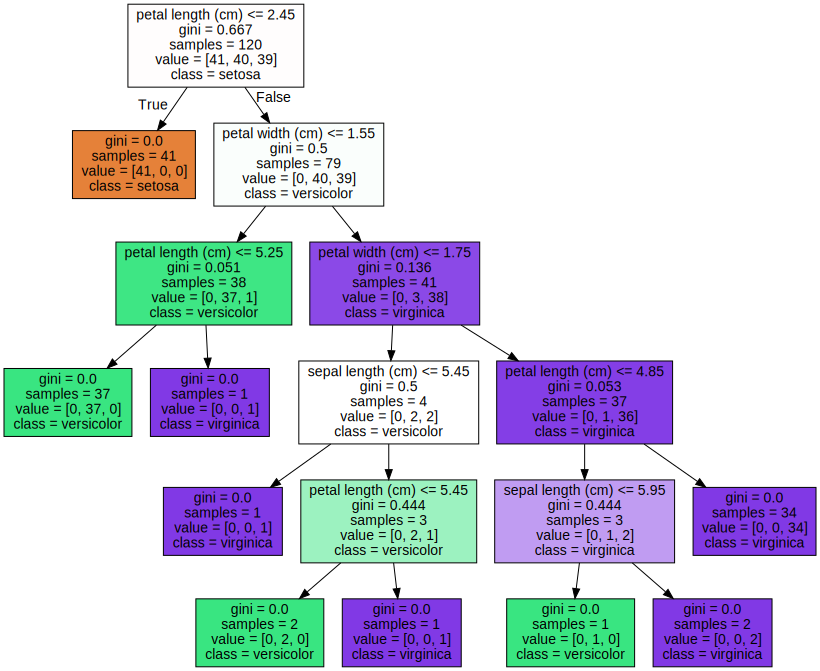

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris_data.target_names, feature_names = iris_data.feature_names, impurity = True,filled = True)
import graphviz

with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances : 
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025005
sepal width (cm) : 0.000000
petal length (cm) : 0.554903
petal width (cm) : 0.420092


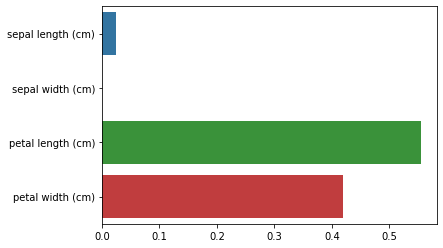

In [ ]:
#피처 중요도 확인

import seaborn as sns
import numpy as np
%matplotlib inline

print('Feature importances : \n{0}'.format(np.round(dt_clf.feature_importances_,3)))

for name,value in zip(iris_data.feature_names, dt_clf.feature_importances_) :
  print('{0} : {1:3f}'.format(name,value))

sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)

### 6. 결정 트리 과적합(Overfitting)
make_classification : 테스트용 데이터 만드는 함수

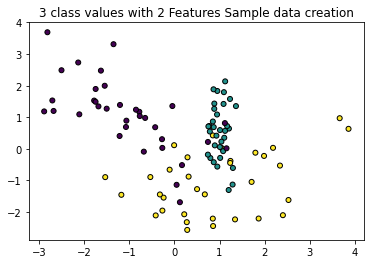

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 class values with 2 Features Sample data creation")

X_features,y_labels = make_classification(n_features = 2, n_redundant= 0, n_informative = 2,
                                          n_classes = 3, n_clusters_per_class = 1, random_state = 0)

plt.scatter(X_features[:,0],X_features[:,1],marker = 'o', c=y_labels,s = 25, edgecolor = 'k')

In [ ]:
# Classifier의 Decision Boundary 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

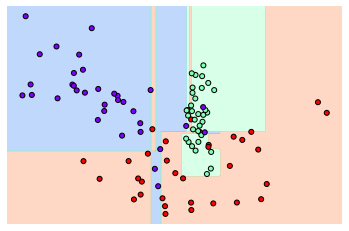

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
#분할이 자주 일어나서 결정 기준 경계가 매우 많아짐
dt_clf = DecisionTreeClassifier().fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

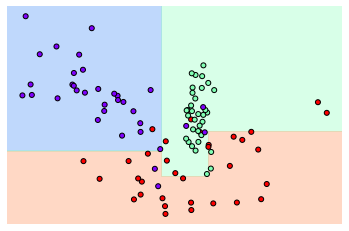

In [ ]:
#min_samples_leaf = 6으로 트리 생성 조거을 제약한 결정 경계 시각화
#이상치에 크게 반응하지 안흐면서 좀 더 일반화된 분류 규칙에 따라 분류됨
#학습 데이터에만 지나치게 최적화된 분류 기준은 테스트 데이터 세트에서 정확도를 떨어뜨릴 수 있음

dt_clf = DecisionTreeClassifier(min_samples_leaf = 6).fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

##3. 앙상블 학습

###1. 개요 
: 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
* Voting : 일반적으로 서로 다른 알고리즘을 가진 분류기 결합
*Bagging : 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 다르게 가져가면서 학습 수행
* Boosting : 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 가중치를 부여하면서 학습 진행
### 2.보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)
* 하드 보팅 : 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정
* 소프트 보팅 : 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정

###3.  보팅 분류기(Voting Classifier)

In [ ]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data,columns = cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 8)

vo_clf = VotingClassifier(estimators = [('LR',lr_clf),('KNN',knn_clf)],voting = 'soft')

X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 156)

#VotingClassifier 학습/예측/평가

vo_clf.fit(X_train,y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도 : {0:4f}'.format(accuracy_score(y_test,pred)))

classifiers =[lr_clf,knn_clf]
for classifier in classifiers :
  classifier.fit(X_train,y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도 : {1:4f}'.format(class_name,accuracy_score(y_test,pred)))

Voting 분류기 정확도 : 0.947368
LogisticRegression 정확도 : 0.938596
KNeighborsClassifier 정확도 : 0.938596


##4. 랜덤 포레스트
###1.개요
: 개별적인 분류기의 기반 알고리즘은 결정 트리이지만, 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트 -> bootstrapping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/UCI HAR Dataset/UCI HAR Dataset/features.txt',sep='\s+', 
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


# 학습/테스트용 데이터 프레임 반환
X_train, X_test, y_train, y_test = get_human_dataset()

#랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train,y_train)

pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('랜덤 포레스트 정확도: {0:4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.925348


* 랜덤 포레스트 하이퍼 파라미터 및 튜님
  * 하이퍼 파라미터가 너무 많고, 튜닝을 위한 시간이 많이 소모된다는 단점이 있음
 * 하이퍼 파라미터
   - n_estimators: 결정 트리의 개수 지정 / default = 10
   - max_features: 결정 트리의 max_features와 동일, default = auto(=sqrt)
   - max_depth: 결정트리의 과적합을 개선하기 위해 사용
   - min_samples_leaf: 결정트리의 과적합을 개선하기 위해 사용

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도: 0.9165


In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=100,  min_samples_leaf=6, max_depth=16, min_samples_split=2, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9260


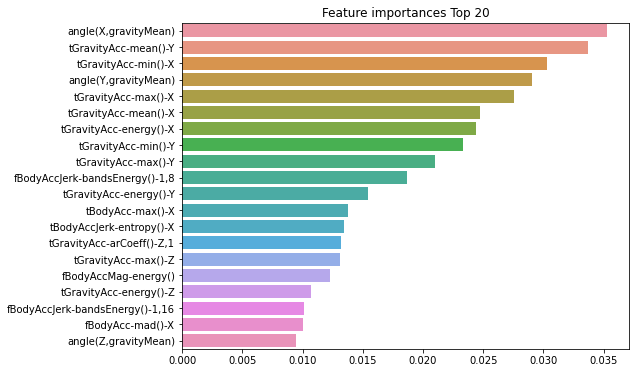

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

### 05. GBM
* 부스팅 알고리즘: 여러 개의 약한 학습기를 순차적으로 학습/예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
  * AdBoost: 오류 데이터에 가중치를 부여하면서 부스팅 수행
  * 그래디언트 부스트: 에이다부스트와 유사한, 가중치 업데이트를 경사 하강법 이용

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9386
GBM 수행 시간: 830.8 초 


* GBM 하이퍼 파라미터 및 튜닝
  - loss: 경사 하강법에서 사용할 비용 함수 지정 / default = deviance
  - learning_rate: GBM이 학습을 진행할 때마다 적용하는 학습률으로, weak learner가 순차적으로 오류 값을 보정해 나가는데 적용하는 계수 / default = 0.1
  - n_estimators: weak learner의 개수 / defqult = 100
  - subsample: weak learner가 학습에 사용하는 데이터의 샘플링 비율 / default = 1


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


In [ ]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))